# Regression

Le resultat : y=1.13358x-2.4124

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset = pd.read_csv('data_reg.csv', sep=';')
dataset.replace(',', '.', regex=True, inplace=True)

# Afficher les 5 premières lignes du dataset
dataset.head()

,Y,X
0,6.159073793,1.267886336
1,8.464401083,3.18549316
2,9.419921953,4.805540849
3,10.22066298,6.462740227
4,9.110854213,7.73498034


On a une fonction
Et on a la liste des 27 points dans le fichier data_reg.csv et on veut trouver le minimum de la fonction qui est en y=1.13358x-2.4124
On utilise 1/n(Σ(yi-yi')²) pour trouver le minimum

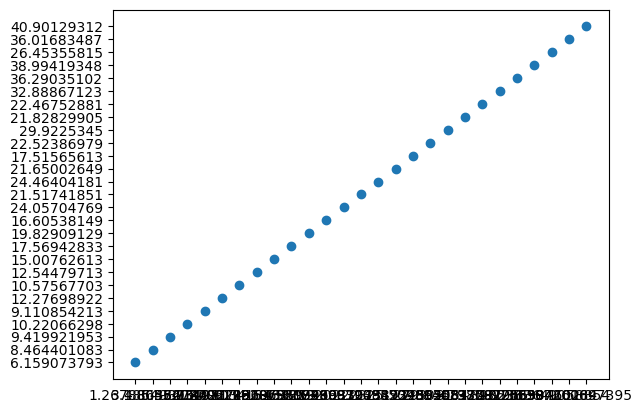

In [18]:
# Visualisation du nuage de points
plt.scatter(dataset['X'], dataset['Y'])

In [20]:
# Déterminer le minimum de la fonction
# On va utiliser la descente de gradient

# Initialisation des paramètres
a = 0
b = 0
n = len(dataset['X'])

# Définir le taux d'apprentissage
alpha = 0.183

# Définir le nombre d'itérations
nb_iterations = 1000

In [1]:
import numpy as np
import pandas as pnd


def solveDGBB_Regression(Y, X, Z1, Z2, alpha, nbmax):  #Méthode de Barzilai-Borwein pour la regression
    b = np.ones(np.shape(X))
    res = Z1 * X + Z2 * b - Y  #résidu
    n = np.size(Y) + 1
    Grad_1 = 1 / n * (np.dot(X.T, res))
    Grad_2 = 1 / n * (np.dot(b.T, res))
    i = 0

    d1 = -Grad_1  #direction pour le coefficient 
    d2 = -Grad_2  #direction pour le décalage

    while (np.sqrt(np.dot(res.T, res)) > 0.0001) & (i < nbmax):
        nouvZ1 = Z1 + alpha * d1
        nouvZ2 = Z2 + alpha * d2
        nouvres = nouvZ1 * X + nouvZ2 * b - Y  #nouveau résidu  
        nouvGrad1 = 1 / n * (np.dot(X.T, nouvres))  #nouveau gradient
        nouvGrad2 = 1 / n * (np.dot(b.T, nouvres))  #nouveau gradient
        Dz1 = alpha * d1
        Dz2 = alpha * d2
        DGrad1 = nouvGrad1 - Grad_1
        DGrad2 = nouvGrad2 - Grad_2
        if DGrad1 * DGrad1 + DGrad2 * DGrad2 < 1.e-16:
            break
        alpha = (Dz1 * DGrad1 + Dz2 * DGrad2) / (DGrad1 * DGrad1 + DGrad2 * DGrad2)  #optimization de Alpha
        Z1 = nouvZ1
        Z2 = nouvZ2
        res = nouvres  #direction
        Grad_1 = nouvGrad1
        Grad_2 = nouvGrad2
        d1 = -Grad_1
        d2 = -Grad_2
        i = i + 1
    return Z1, Z2, i


donnees = pnd.read_csv('data_reg.csv', decimal=',', sep=';')
print(donnees)
YY, XX = donnees[['Y']].to_numpy(), donnees[['X']].to_numpy()
Z1, Z2, i = solveDGBB_Regression(YY, XX, 0, 0, 1, 10000)
print("La regression donne Y= ", Z1[0], "*X +", Z2[0], "après ", i, "étapes")

            Y          X
0    6.159074   1.267886
1    8.464401   3.185493
2    9.419922   4.805541
3   10.220663   6.462740
4    9.110854   7.734980
5   12.276989   9.270629
6   10.575677  10.917619
7   12.544797  11.952070
8   15.007626  13.843325
9   17.569428  15.152085
10  19.829091  16.819960
11  16.605381  18.739987
12  24.057048  19.868107
13  21.517419  20.939085
14  24.464042  22.145892
15  21.650026  23.952349
16  17.515656  25.509864
17  22.523870  27.395064
18  29.922535  29.140812
19  21.828299  30.473760
20  22.467529  31.980830
21  32.888671  33.902364
22  36.290351  34.973898
23  38.994193  36.665946
24  26.453558  38.307202
25  36.016835  39.905885
26  40.901293  41.606974
La regression donne Y=  [0.76206135] *X + [4.65283446] après  7 étapes
